# Clustering Photos from an Instagram account

#### My dad is a nature photographer and has over 1700 of his photos on his instagram account (https://www.instagram.com/djbrooksjr/). I scrapped the photos from his account. I wanted to try out some image recommendations (i.e. show me similar photos to the selected photo) and try to see if I could properly cluster them, as a first look suggests there are certain categories of photo, e.g. landscape, elk/moose, birds, etc.

#### I'll start by using a pretrained CNN and remove the last few layers that perform prediction so we can access the relevant features

#### Then we can use cosine similarities for the recommendation, and PCA and clustering algorithms for the clustering

In [6]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

### I used this github repo to scrape the photos from instagram: https://github.com/darshan-majithiya/Scraping-Photos-and-Descriptions-from-an-Instagram-account

In [7]:
# parameters setup

imgs_path = "Scraping-Photos-and-Descriptions-from-an-Instagram-account/data/djbrooksjr/images/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [8]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467904/553467096 [==============================] - 66s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________

In [14]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 1739


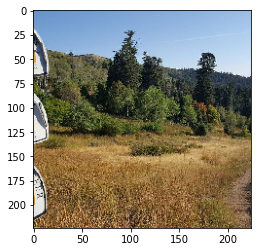

image loaded successfully!


In [16]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [18]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [19]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[1.8127712 , 2.716859  , 0.841437  , ..., 0.76265323, 1.8643134 ,
        4.2799454 ]], dtype=float32)

In [20]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [21]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(1739, 4096)

In [25]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

Scraping-Photos-and-Descriptions-from-an-Instagram-account/data/djbrooksjr/images/image_1502.jpg  \
Scraping-Photos-and-Descriptions-from-an-Instag...                                           1.000000                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.211151                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.449394                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.215135                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.325050                                                  

                                                    Scraping-Photos-and-Descriptions-from-an-Instagram-account/data/djbrooksjr/images/image_811.jpg  \
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.211151                                                 
Scraping-Photos-and-Descriptions-from-an-Instag...                                           1.000000                                                 
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.380980                                                 
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.246754                                                 
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.373905                                                 

                                                    Scraping-Photos-and-Descriptions-from-an-Instagram-account/data/djbrooksjr/images/image_1264.jpg  \
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.449394                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.380980                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           1.000000                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.307430                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.622821                                                  

                                                    Scraping-Photos-and-Descriptions-from-an-Instagram-account/data/djbrooksjr/images/image_1270.jpg  \
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.215135                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.246754                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.307430                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           1.000000                                                  
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.250272                                                  

                                                    Scraping-Photos-and-Descriptions-from-an-Instagram-account/data/djbrooksjr/images/image_805.jpg  \
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.325050                                                 
Scraping-Photos-and-Descriptions-from-an-Instag...                                           0.373905   

In [26]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


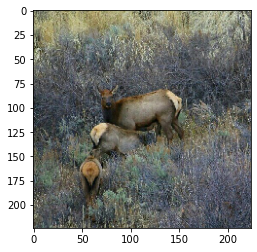

-----------------------------------------------------------------------
most similar products:


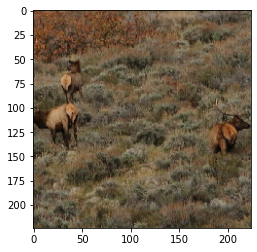

similarity score :  0.72661704


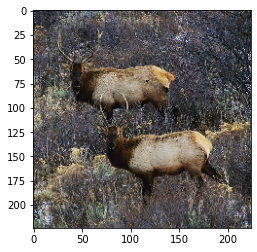

similarity score :  0.60613877


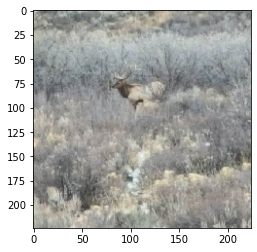

similarity score :  0.59794587


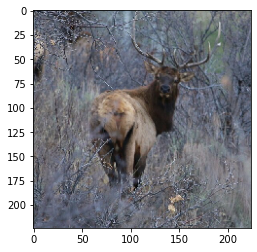

similarity score :  0.59468913


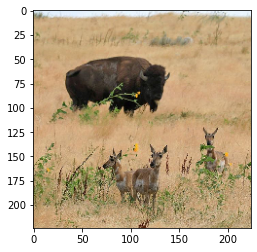

similarity score :  0.59325


In [34]:
retrieve_most_similar_products(files[389])

# On To Clustering

### After playing around with above function, inputing random file numbers, I'm happy with its performance. Now I want to attempt to use the image features matrix to cluster the images and see if the cluster correspond to categories like "bird pics, elk pics, mountain pics, etc." I think 4096 is too many dimensions to do clustering, since we will likey suffer the curse of dimensionality if we try. So let's use PCA to decrease the dimensionality of our parameter space for the purposes of clustering

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

#### Scaling and normalizing features can be useful in your feature are of different types and scales, but all our features are images features. Also, I tried scaling and normalizing anyway, and the explained variance drops given the same number of components, so I didn't end up using the scaling and normalizing functions

In [233]:
df_img = pd.DataFrame(data=imgs_features, index = files)

# # Scaling the data to bring all the attributes to a comparable level 
# scaler = StandardScaler() 
# df_img_scaled = scaler.fit_transform(df_img) 
  
# # Normalizing the data so that  
# # the data approximately follows a Gaussian distribution 
# df_img_normalized = normalize(df_img_scaled) 
  
# # Converting the numpy array into a pandas DataFrame 
# df_img_normalized = pd.DataFrame(df_img_normalized)

pca = PCA(n_components=2)
pca.fit(df_img)

pca_df = pd.DataFrame(pca.transform(df_img))

In [234]:
sum(pca.explained_variance_ratio_)

0.1380087472498417

In [154]:
from sklearn.cluster import DBSCAN 

In [183]:
db_default = DBSCAN(eps = 7, min_samples = 5).fit(pca_df) 
labels = db_default.labels_ 
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [184]:
data = {'file': files, 'cluster': labels}
cluster_df = pd.DataFrame(data=data)
cluster_df.head()

file  cluster
0  Scraping-Photos-and-Descriptions-from-an-Insta...        0
1  Scraping-Photos-and-Descriptions-from-an-Insta...        0
2  Scraping-Photos-and-Descriptions-from-an-Insta...        0
3  Scraping-Photos-and-Descriptions-from-an-Insta...       -1
4  Scraping-Photos-and-Descriptions-from-an-Insta...        0

In [185]:
for l in set(labels):
    print(len(cluster_df[cluster_df['cluster']==l]))

1307
8
49
5
6
7
5
6
4
342


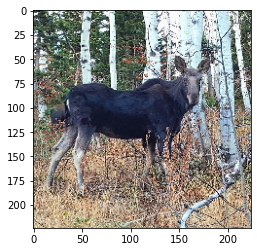

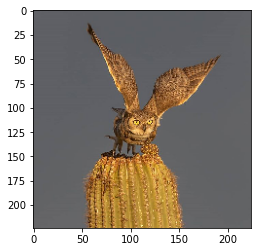

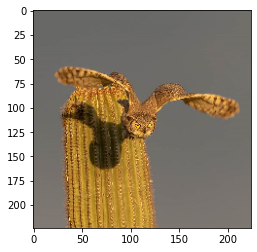

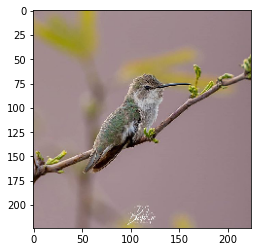

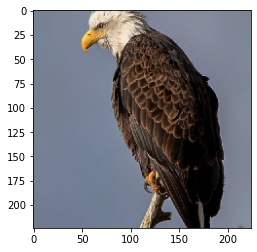

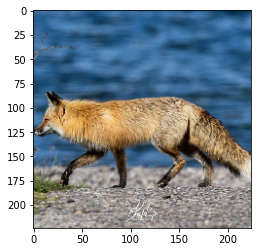

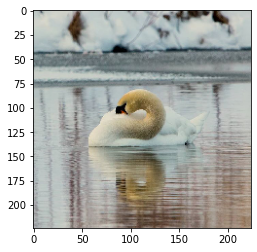

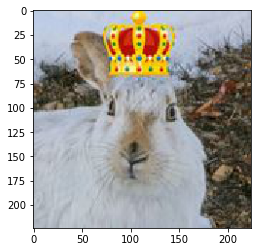

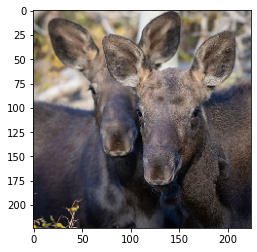

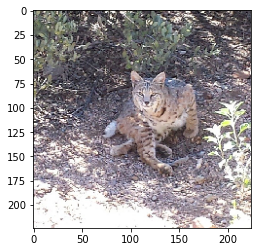

In [151]:
for i in range(10):
    file = cluster_df[cluster_df['cluster']==-1]['file'].iloc[i]
    original = load_img(file, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

### DBSCAN kept putting most of the datapoints in the "noise" category (-1) and it's overall performance over a range of hyperparameters was unsatisfactory, so let's try Kmeans clustering

In [186]:
from sklearn.cluster import KMeans

In [244]:
kmeans = KMeans(init="random",
                n_clusters=6,
                n_init=10,
                max_iter=300,
                random_state=42)

In [245]:
kmeans.fit(pca_df)
labels = kmeans.labels_ 
set(labels)

{0, 1, 2, 3, 4, 5}

In [246]:
data = {'file': files, 'cluster': labels}
cluster_df = pd.DataFrame(data=data)
cluster_df.head()

file  cluster
0  Scraping-Photos-and-Descriptions-from-an-Insta...        1
1  Scraping-Photos-and-Descriptions-from-an-Insta...        1
2  Scraping-Photos-and-Descriptions-from-an-Insta...        4
3  Scraping-Photos-and-Descriptions-from-an-Insta...        2
4  Scraping-Photos-and-Descriptions-from-an-Insta...        4

In [247]:
for l in set(labels):
    print(len(cluster_df[cluster_df['cluster']==l]))

101
481
131
115
657
254


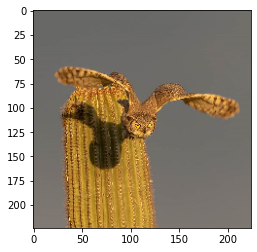

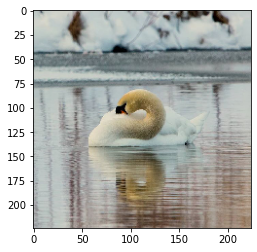

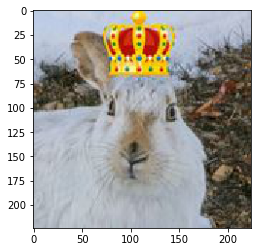

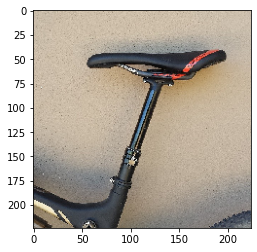

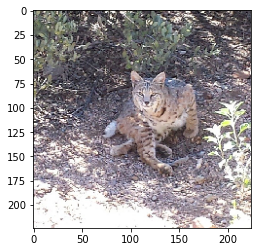

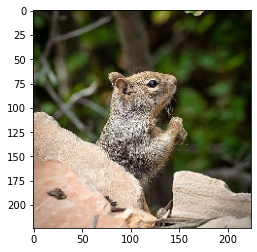

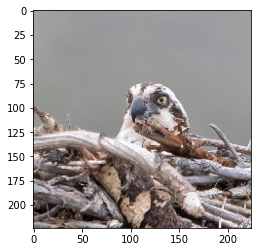

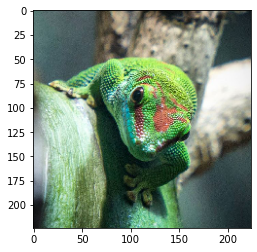

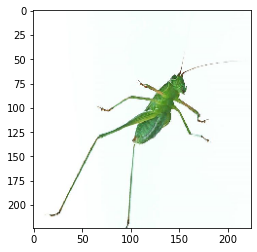

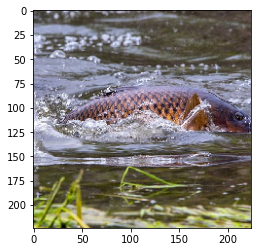

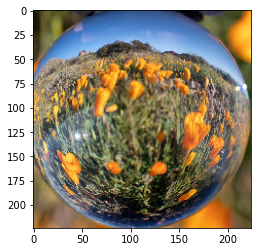

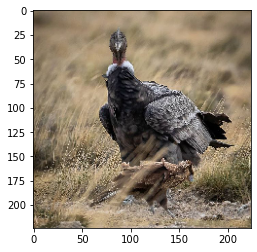

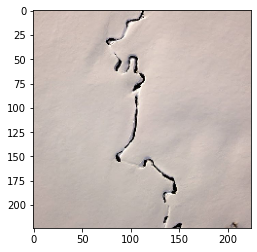

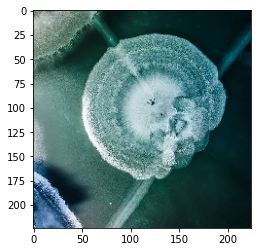

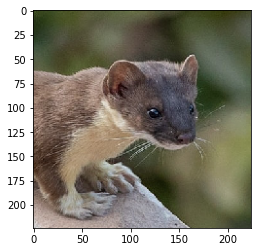

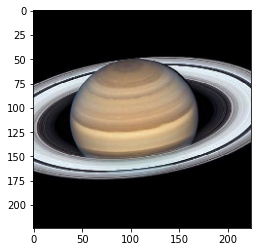

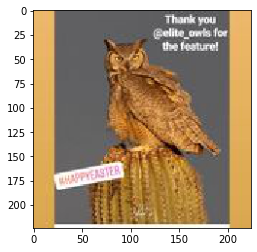

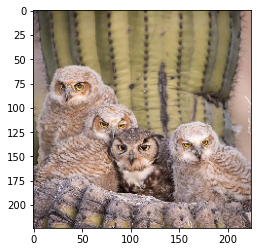

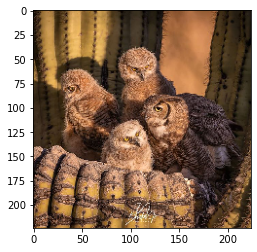

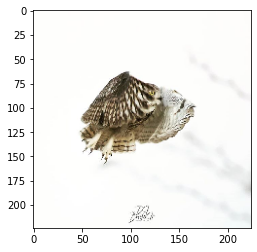

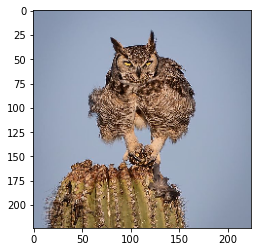

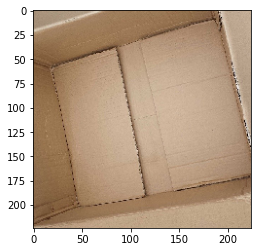

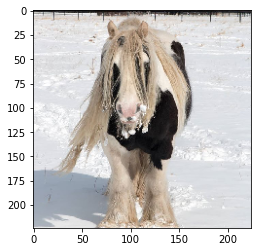

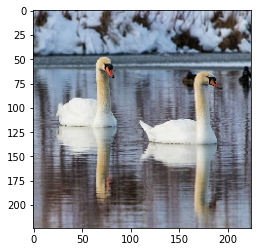

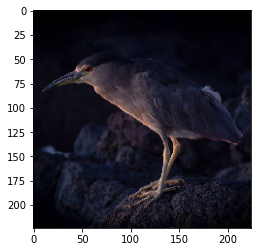

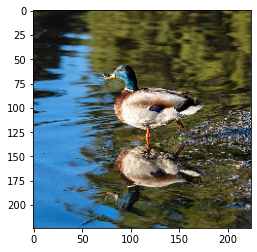

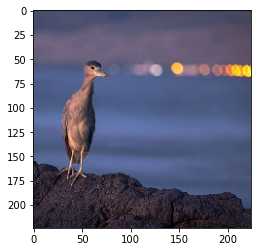

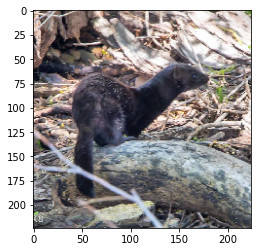

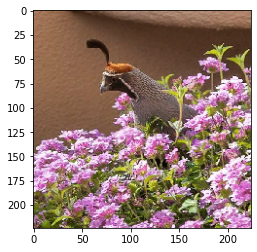

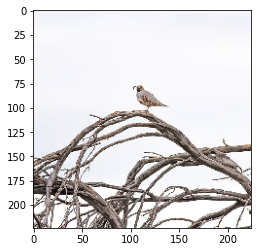

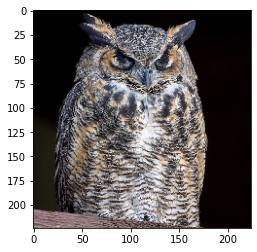

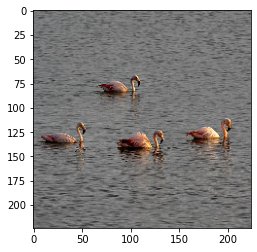

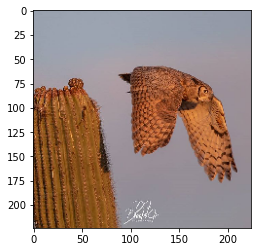

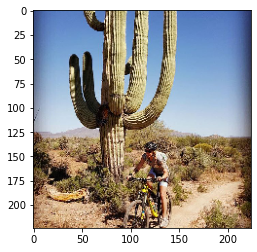

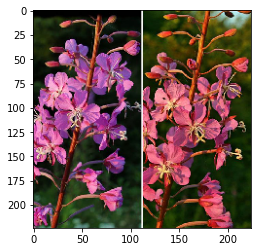

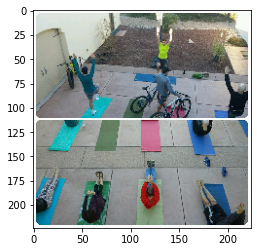

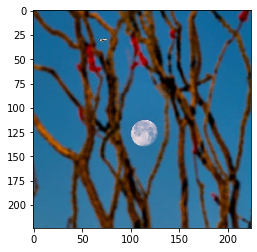

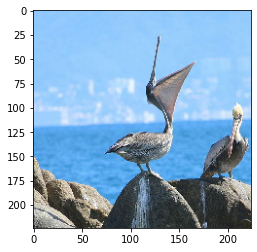

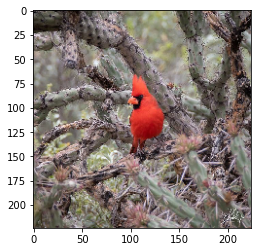

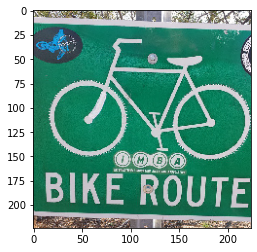

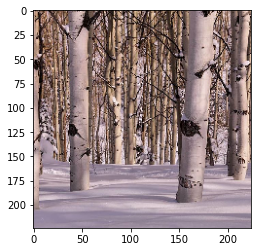

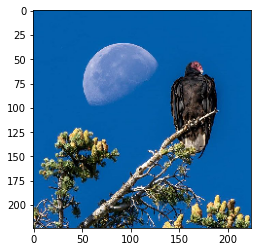

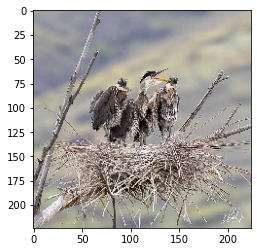

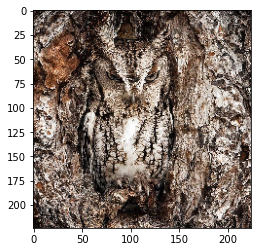

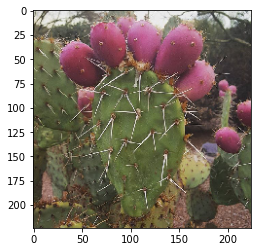

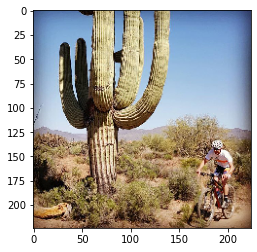

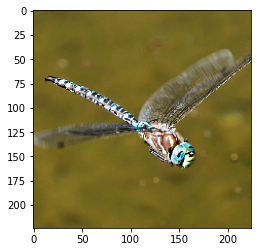

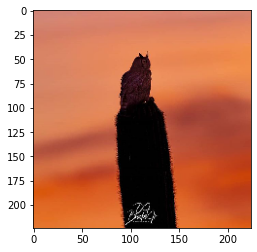

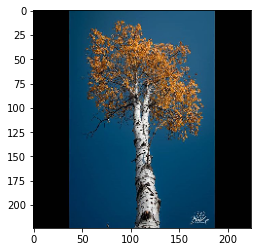

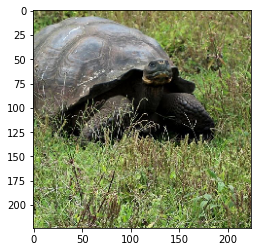

In [268]:
for i in range(50):
    file = cluster_df[cluster_df['cluster']==5]['file'].iloc[i]
    original = load_img(file, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

### Kmeans is doing a much better job, the categories seem to be coherent and meaningful.

### After trying out several combinations of different number of cluster and different number of principle components, I settled on 2 PCs (partially for plot making) and 6 categories.

In [276]:
%matplotlib agg
%matplotlib agg

# Building the label to colour mapping 
colors = {} 
colors[0] = '#377eb8'
colors[1] = '#ff7f00'
colors[2] = '#4daf4a'
colors[3] = '#f781bf'
colors[4] = '#a65628'
colors[5] = '#984ea3'
  
# Building the colour vector for each data point 
cvec = [colors[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(pca_df[0], pca_df[1], color = colors[0]); 
g = plt.scatter(pca_df[0], pca_df[1], color = colors[1]); 
b = plt.scatter(pca_df[0], pca_df[1], color = colors[2]); 
k = plt.scatter(pca_df[0], pca_df[1], color = colors[3]); 
o = plt.scatter(pca_df[0], pca_df[1], color = colors[4]); 
y = plt.scatter(pca_df[0], pca_df[1], color = colors[5]); 

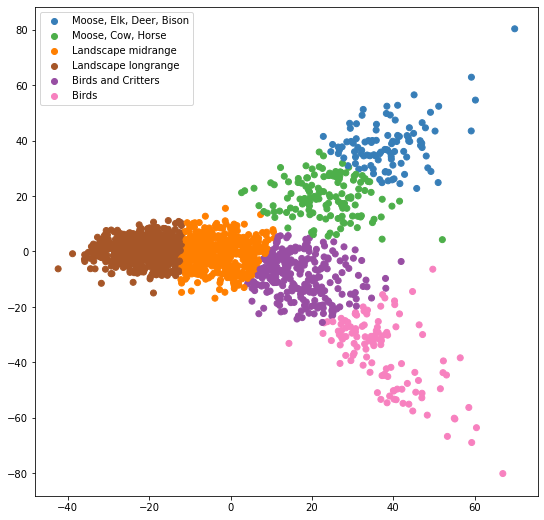

In [278]:
%matplotlib inline

plt.figure(figsize =(9, 9)) 
plt.scatter(pca_df[0], pca_df[1], c = cvec) 
  
# Building the legend 
# The labels are generated from manual inspection
plt.legend((r, b, g, o, y, k), ('Moose, Elk, Deer, Bison', 'Moose, Cow, Horse', 'Landscape midrange', 'Landscape longrange', 'Birds and Critters', 'Birds')) 
  
plt.show()